In [20]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
df = pd.read_csv('network_data/berlin/network_subway.csv', sep = ';')
df.index += 1
df.head()

from_stop_I  to_stop_I     d  duration_avg  n_vehicles route_I_counts
1         2562       2563  1074         120.0         215        966:215
2         2562       2453  1626         120.0         216        966:216
3         2563       2609  1328         120.0         215        966:215
4         2563       2562  1074         120.0         216        966:216
5         1544       1545   648          60.0         229        969:229

In [9]:
G = nx.from_pandas_edgelist(df, source='from_stop_I', target='to_stop_I', edge_attr='duration_avg')

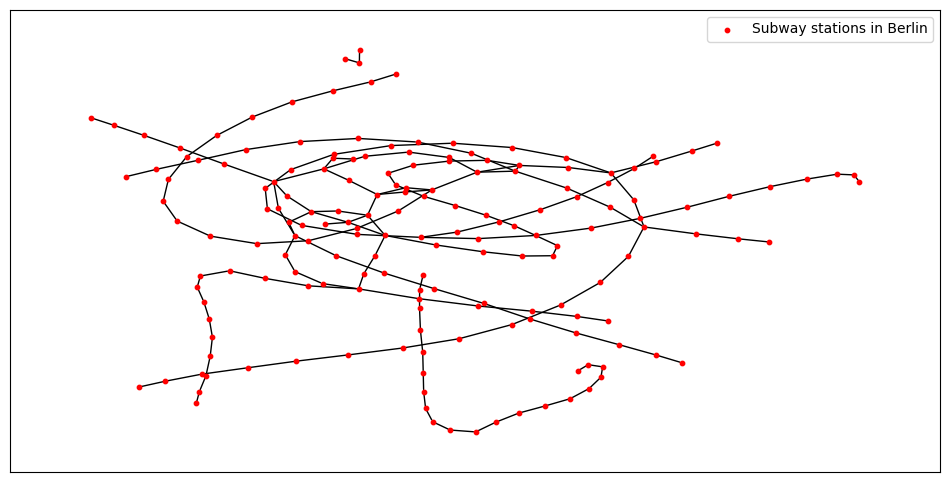

In [15]:
plt.figure(figsize=(12, 6))
nx.draw_networkx(G, with_labels=False, arrows=True, 
                 node_size = 10, node_color = 'red', label='Subway stations in Berlin', width=1)

plt.legend()
plt.show()

In [11]:
nodes = pd.read_csv('network_data/berlin/network_nodes.csv', sep=';')
nodes.head()

stop_I        lat        lon                           name
0     105  52.528318  13.320260  Wiebestr./Huttenstr. (Berlin)
1     106  52.527903  13.323637          Reuchlinstr. (Berlin)
2     107  52.529103  13.315981            Neues Ufer (Berlin)
3     108  52.525756  13.309840      Ilsenburger Str. (Berlin)
4     109  52.525797  13.314261        Goslarer Platz (Berlin)

In [12]:
stats = pd.read_csv('network_data/berlin/stats.csv', sep=';')
stats = stats.transpose()
stats

0
buffer_center_lat     52.519004
buffer_center_lon     13.402914
buffer_radius_km           30.0
extract_start_date   2016-04-25
link_distance_avg_m         743
n_connections           1048218
n_links                   12079
n_stops                    4601
network_length_m        8986014
vehicle_kilometers   588371.215

In [21]:
fig = px.scatter_mapbox(nodes, 
                        lat="lat", 
                        lon="lon",
                        hover_name="name",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()